## Build a machine learning  model for the dataset whether HIV-1 protease will cleave in the central position (between amino acids 4 and 5)

### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries//')
from ipynb.fs.full.ml_library import *
import os
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')

# reading dataset from different files & storing in pandas dataframe
hiv_data = pd.read_table('746Data.txt', sep=',',names=['octamer','cleaves'])
hiv_data = hiv_data.append(pd.read_table('1625Data.txt', sep=',',names=['octamer','cleaves']))
hiv_data = hiv_data.append(pd.read_table('schillingData.txt', sep=',',names=['octamer','cleaves']))
hiv_data = hiv_data.append(pd.read_table('impensData.txt', sep=',',names=['octamer','cleaves']))
hiv_data.head()

,octamer,cleaves
0,AAAKFERQ,-1
1,AAAMKRHG,-1
2,AAAMSSAI,-1
3,AAKFERQH,-1
4,AAKFESNF,-1


In [2]:
hiv_data.info()                      # observing datatypes of columns & checking null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6590 entries, 0 to 946
Data columns (total 2 columns):
octamer    6590 non-null object
cleaves    6590 non-null int64
dtypes: int64(1), object(1)
memory usage: 154.5+ KB


#### Creating different feature column for each character in octamer

In [3]:
feature = 'octamer'
label = 'cleaves'

In [4]:
# using fn from custom library for this dataset 
x_values = separate_feature_column(hiv_data, feature)
x_values[:10]

array([['A', 'A', 'A', 'K', 'F', 'E', 'R', 'Q'],
       ['A', 'A', 'A', 'M', 'K', 'R', 'H', 'G'],
       ['A', 'A', 'A', 'M', 'S', 'S', 'A', 'I'],
       ['A', 'A', 'K', 'F', 'E', 'R', 'Q', 'H'],
       ['A', 'A', 'K', 'F', 'E', 'S', 'N', 'F'],
       ['A', 'A', 'M', 'K', 'R', 'H', 'G', 'L'],
       ['A', 'A', 'S', 'S', 'S', 'N', 'Y', 'C'],
       ['A', 'A', 'V', 'L', 'A', 'E', 'A', 'M'],
       ['A', 'C', 'E', 'G', 'N', 'P', 'Y', 'V'],
       ['A', 'C', 'K', 'N', 'G', 'Q', 'T', 'N']], dtype='<U32')

#### One hot encoding for each column created

In [5]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encode = OneHotEncoder()
x_values = one_hot_encode.fit_transform(x_values)

y_values = hiv_data[label].values
y_values[y_values==-1] = 0

#### Splitting dataset into train set & test set

In [6]:
from sklearn.model_selection import train_test_split
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.8, random_state=0)

### Building logistic regression model

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(train_x_values, train_y_values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Storing reusable objects into pickle file

In [8]:
import joblib
file = open('DataProcessingHIV.pkl', 'wb')
joblib.dump(feature, file)
joblib.dump(label, file)
joblib.dump(one_hot_encode, file)
file.close()

file = open('LogisticModelHIV.pkl', 'wb')
joblib.dump(classifier, file)
file.close()

#### Storing predictions for test set

In [9]:
test_prediction = classifier.predict(test_x_values)

### Evaluatinig model against test set

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')
print(f'Accuracy score: {accuracy_score(test_y_values, test_prediction)}')
print(f'Precision score: {precision_score(test_y_values, test_prediction)}')
print(f'Recall score: {recall_score(test_y_values, test_prediction)}')
print(f'F1 score: {f1_score(test_y_values, test_prediction)}')

Confusion matrix:
 [[1016   27]
 [  47  228]]
Accuracy score: 0.9438543247344461
Precision score: 0.8941176470588236
Recall score: 0.8290909090909091
F1 score: 0.8603773584905662


### Plotting CAP curve

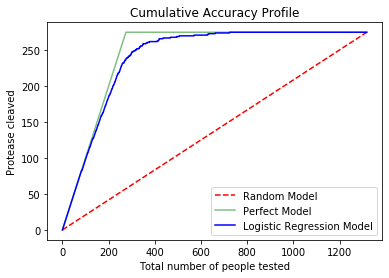

In [16]:
y_axis_values = plot_cap_curve(test_x_values, test_y_values, classifier, 'Total number of people tested', 'Protease cleaved', 'Logistic Regression Model')